<a href="https://colab.research.google.com/github/amitadhainje/ImageRecognition/blob/main/Yolov3_Custom_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Following is the code to keep the colab window alive
# function ClickConnect(){
# console.log("Working"); 
# document.querySelector("colab-toolbar-button#connect").click() 
# }
# setInterval(ClickConnect,60000)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'   face-data		   ImportantBooks   YOLO
 darknet	   'Getting started.pdf'  'My Drive'


In [3]:
# # get yolov3 pretrained coco dataset weights
# #get yolov3 weights
# !wget https://pjreddie.com/media/files/yolov3.weights
# !wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
# !wget https://github.com/pjreddie/darknet/blob/master/data/coco.names
# # upload pretrained convolutional layer weights
# !wget http://pjreddie.com/media/files/darknet53.conv.74

In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# verify CUDA
!/usr/local/cuda/bin/nvcc --version

# make darknet (build)
!make

Cloning into 'darknet'...
remote: Enumerating objects: 14358, done.
remote: Total 14358 (delta 0), reused 0 (delta 0), pack-reused 14358
Receiving objects: 100% (14358/14358), 13.06 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (9765/9765), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: v

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
#!ls -ltr *.jpg

In [6]:
#!./darknet detect cfg/yolov3.cfg /mydrive/YOLO/yolov3.weights data/person.jpg
#imShow('predictions.jpg')

In [34]:
#!mv classes.names face_image_1.jpg face_image_1.txt face_image_2.jpg face_image_2.txt test.txt train.txt labelled_data.data /mydrive/testData/
upload()
!mv yolov3_custom.cfg cfg/
#!ls /mydrive/YOLO/

Saving yolov3_custom.cfg to yolov3_custom.cfg
saved file yolov3_custom.cfg


In [25]:
!head -n 20 cfg/yolov3_custom.cfg

[net]
# Testing
batch=64
subdivisions=16
# Training
# batch=64
# subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.01
burn_in=1000
max_batches = 100
policy=steps


In [35]:
!./darknet detector train /mydrive/face-data/labelled_data.data cfg/yolov3_custom.cfg /mydrive/YOLO/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.373234, GIOU: 0.315886), Class: 0.632409, Obj: 0.025928, No Obj: 0.020400, .5R: 0.142857, .75R: 0.000000, count: 7, class_loss = 2.500793, iou_loss = 4.826229, total_loss = 7.327022 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.354576, GIOU: 0.253018), Class: 0.440497, Obj: 0.004061, No Obj: 0.008495, .5R: 0.000000, .75R: 0.000000, count: 4, class_loss = 1.786874, iou_loss = 2.297154, total_loss = 4.084028 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.003850, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.397584, iou_loss = 0.000000, total_loss = 0.397584 
 total_bbox = 24308, rewritten_bbox = 0.004114 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.491424, GIOU: 0.486249), Class: 0.523068, Obj: 0.023016, No Obj: 

In [36]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [28]:
!head -n 10 cfg/yolov3_custom.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=1
# subdivisions=1
width=608
height=608
channels=3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

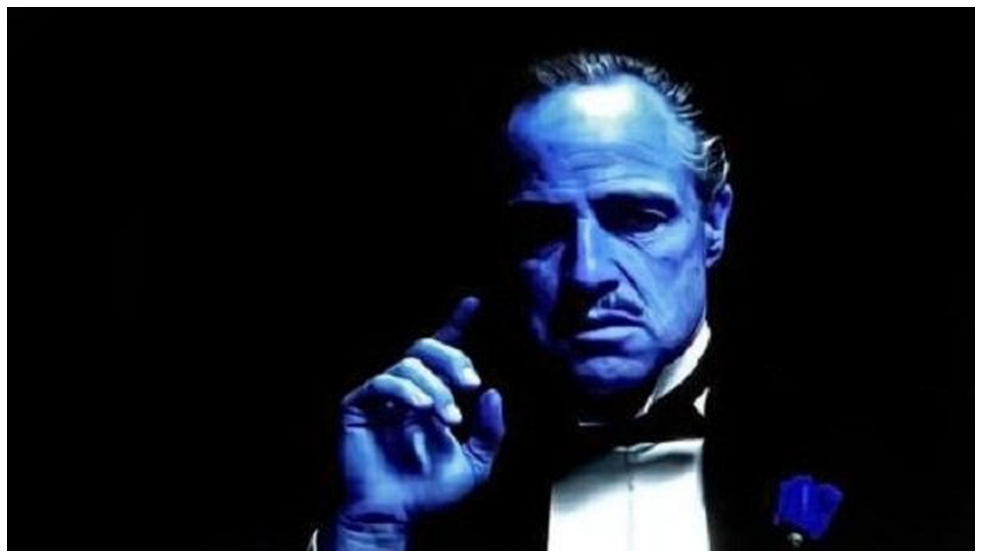

In [37]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /mydrive/face-data/labelled_data.data cfg/yolov3_custom.cfg /mydrive/face-data/backup/yolov3_custom_final.weights /mydrive/face-data/face_image_11.jpg -thresh 0.1
imShow('predictions.jpg')